# Data Info -

1. age: Age of an individual

2. workclass:Individual work category

3. fnlwgt:final weight

4. education:the highest level of education achieved by an individual

5. education.num: The highest level of education achieved in numerical form

6. marital.status: marital status of an individual

7. occupation: the general type of occupation of an individual.

8. relationship: represents what this individual is relative to others.

9. race:Descriptions of an individual’s race.

10. sex:the biological sex of the individual.

11. capital.gain:capital gains for an individual

12. capital.loss : capital loss for an individual

13. hours.per.week: the hours an individual has reported to work per week

14. native.country: country of origin for an individual

15. income:whether or not an individual makes more than $50,000 annually <=50k,>50k


### Data gathering and Understanding


### Data preparation

### Data Cleaning

### Exploratory data analysis

### Feature engineering and selection

### ML Model assumption and checks

### Data preparation for modelling

### Model Building

### Model Validation & Evaluation

### Predictions & Model deployment

Importing Packages

In [253]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [254]:
# load Dataset
df = pd.read_csv("C:/Users/NOOMAN KHAN/Downloads/adult_dataset-1 - adult_dataset-1.csv")
df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,"£4,356.00",40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,"£4,356.00",18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,"£4,356.00",40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,"£3,900.00",40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,"£3,900.00",40,United-States,<=50K


Data Cleaning

In [255]:
df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education.num     0
marital.status    0
occupation        0
relationship      1
race              0
sex               0
capital.gain      0
capital.loss      0
hours.per.week    0
native.country    0
income            0
dtype: int64

"?" replace with null

In [256]:
df = df.replace("?",np.nan)

In [257]:
df.isnull().sum()

age                  0
workclass         1836
fnlwgt               0
education            0
education.num        0
marital.status       0
occupation        1843
relationship         1
race                 0
sex                  0
capital.gain         0
capital.loss         0
hours.per.week       0
native.country     583
income               0
dtype: int64

Earlier there is zero null but convert "?" into nan there is some null occur

### capital.loss column we have to remove euro sign and we have to convert that amount into dollar because income in dollar

In [258]:
df["capital.loss"] = df["capital.loss"].str[1:]

"," also there 

In [259]:
df["capital.loss"] = df["capital.loss"].str.replace(",","")

In [260]:
df["capital.loss"] = pd.to_numeric(df["capital.loss"],errors = "coerce")

In [261]:
df["capital.loss"] = df["capital.loss"]*1.04

In [262]:
df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,NaN,77053,HS-grad,9,Widowed,NaN,Not-in-family,White,Female,0,4530.24,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4530.24,18,United-States,<=50K
2,66,NaN,186061,Some-college,10,Widowed,NaN,Unmarried,Black,Female,0,4530.24,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,4056.00,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,4056.00,40,United-States,<=50K


Convert income column into binary on the basis of condition

In [263]:
df["income"] = np.where(df["income"]=="<=50K",1,0)

In [264]:
df["income"].value_counts()

1    24720
0     7841
Name: income, dtype: int64

Data imbalace We deal with later during model building

In [265]:
df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,NaN,77053,HS-grad,9,Widowed,NaN,Not-in-family,White,Female,0,4530.24,40,United-States,1
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4530.24,18,United-States,1
2,66,NaN,186061,Some-college,10,Widowed,NaN,Unmarried,Black,Female,0,4530.24,40,United-States,1
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,4056.00,40,United-States,1
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,4056.00,40,United-States,1


In [266]:
for i in df.columns:
    print(df[i].value_counts())

36    898
31    888
34    886
23    877
35    876
     ... 
83      6
88      3
85      3
86      1
87      1
Name: age, Length: 73, dtype: int64
Private             22696
Self-emp-not-inc     2541
Local-gov            2093
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: workclass, dtype: int64
123011    13
203488    13
164190    13
126675    12
148995    12
          ..
45487      1
183522     1
44419      1
442612     1
257302     1
Name: fnlwgt, Length: 21650, dtype: int64
HS-grad         10501
Some-college     7291
Bachelors        5355
Masters          1723
Assoc-voc        1382
11th             1175
Assoc-acdm       1067
10th              933
7th-8th           646
Prof-school       576
9th               514
12th              433
Doctorate         413
5th-6th           333
1st-4th           168
Preschool          51
Name: education, dtype: int64
9     10501
10     7291
13     5355
14     1723
1

In [267]:
df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,NaN,77053,HS-grad,9,Widowed,NaN,Not-in-family,White,Female,0,4530.24,40,United-States,1
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4530.24,18,United-States,1
2,66,NaN,186061,Some-college,10,Widowed,NaN,Unmarried,Black,Female,0,4530.24,40,United-States,1
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,4056.00,40,United-States,1
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,4056.00,40,United-States,1


## EDA

bivarient Analysis with income

Categorical feature

In [268]:
numeric = ["int32","int64","float32","float64"]
df.select_dtypes("object").columns

Index(['workclass', 'fnlwgt', 'education', 'marital.status', 'occupation',
       'relationship', 'race', 'sex', 'native.country'],
      dtype='object')

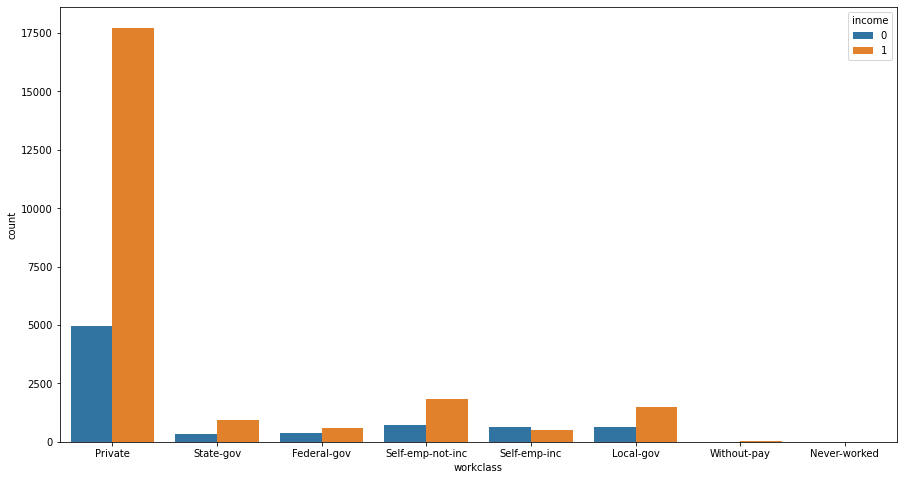

In [269]:
plt.figure(figsize = (15,8))
sns.countplot(x = df["workclass"] , hue = df["income"])
plt.show()

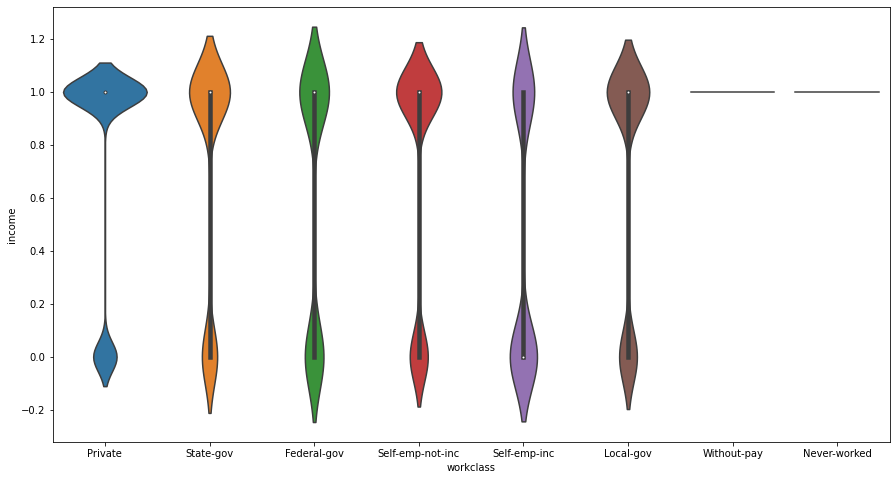

In [270]:
plt.figure(figsize = (15,8))
sns.violinplot(x = df["workclass"] , y = df["income"])
plt.show()

In [271]:
df.head(1)

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,NaN,77053,HS-grad,9,Widowed,NaN,Not-in-family,White,Female,0,4530.24,40,United-States,1


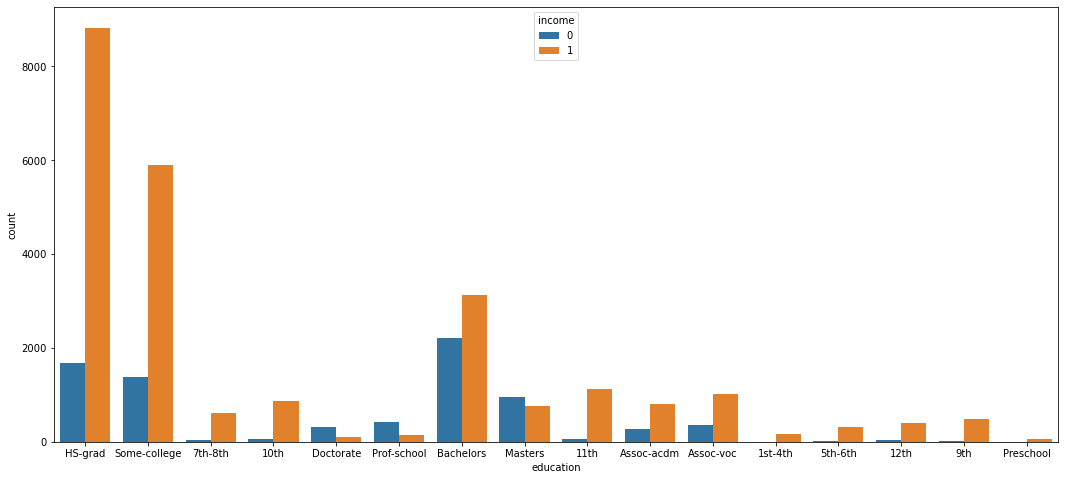

In [272]:
plt.figure(figsize = (18,8))
sns.countplot(x = df["education"] , hue = df["income"])
plt.show()

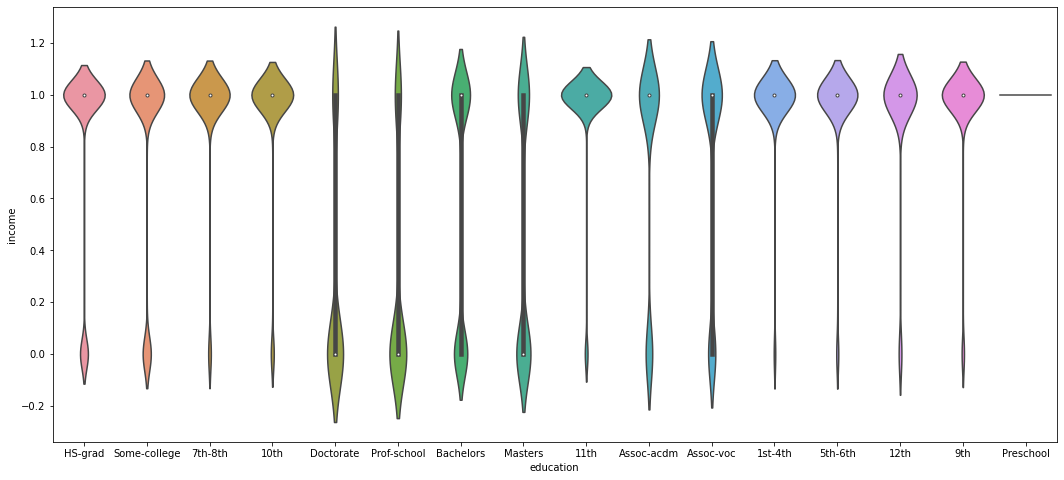

In [273]:
plt.figure(figsize = (18,8))
sns.violinplot(x = df["education"] , y = df["income"])
plt.show()

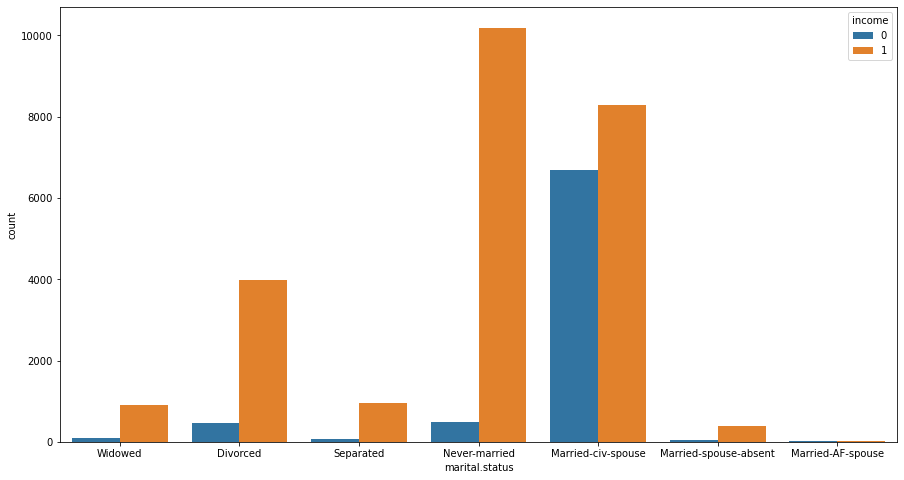

In [274]:
plt.figure(figsize = (15,8))
sns.countplot(x = df["marital.status"] , hue = df["income"])
plt.show()

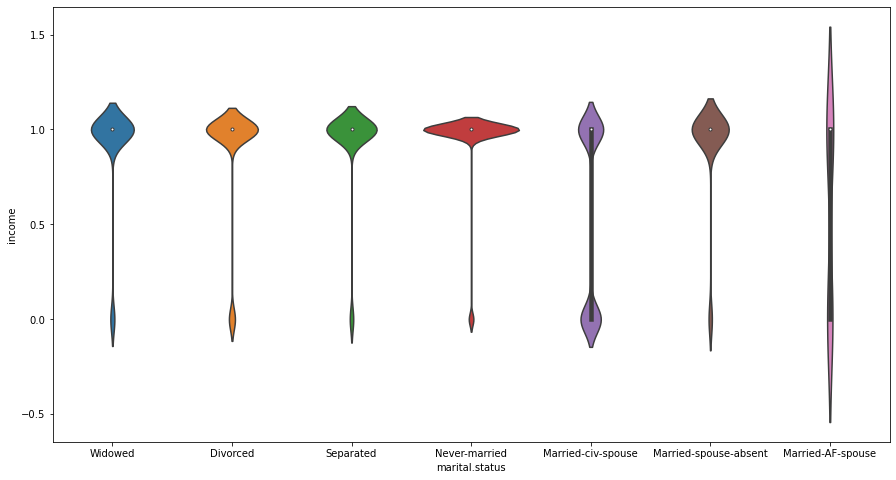

In [275]:
plt.figure(figsize = (15,8))
sns.violinplot(x = df["marital.status"] , y = df["income"])
plt.show()

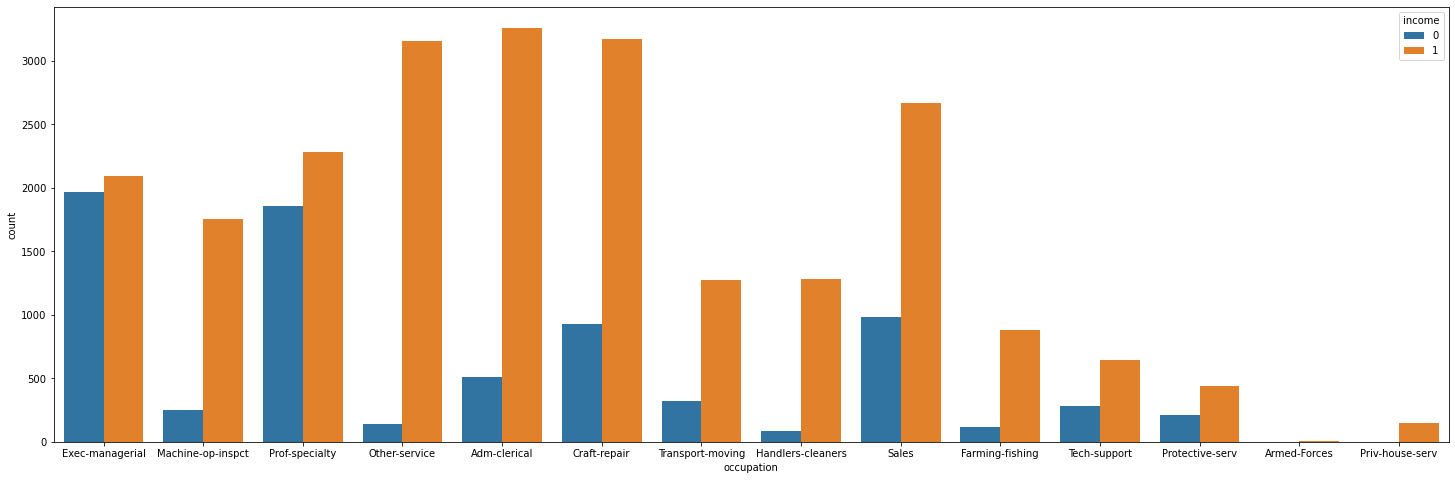

In [276]:
plt.figure(figsize = (25,8))
sns.countplot(x = df["occupation"] , hue = df["income"])
plt.show()

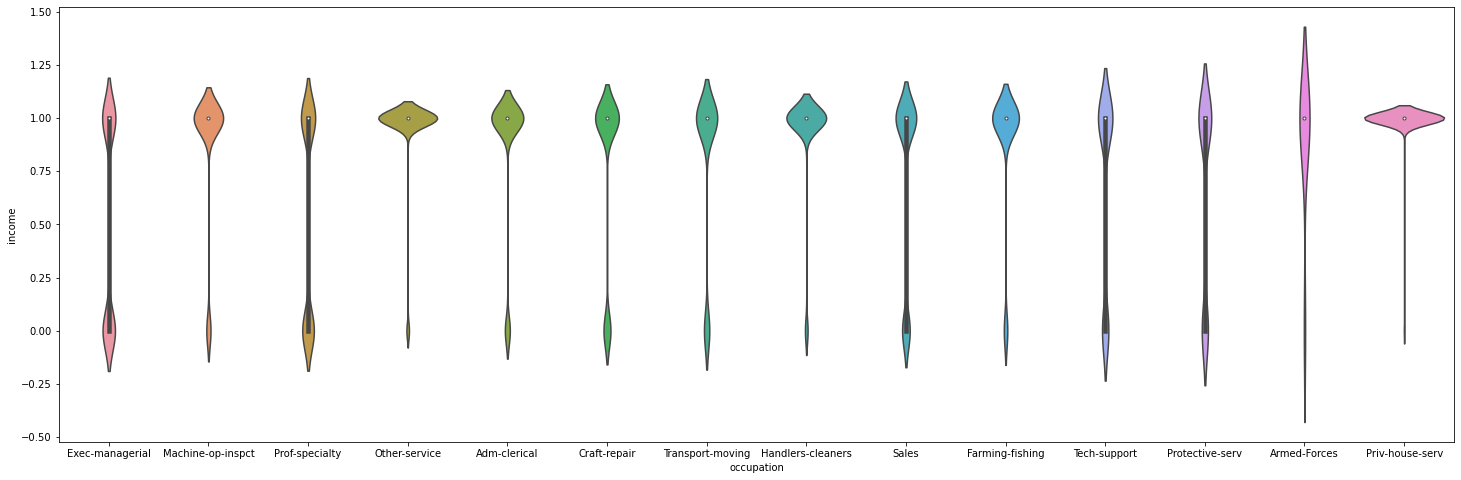

In [277]:
plt.figure(figsize = (25,8))
sns.violinplot(x = df["occupation"] , y = df["income"])
plt.show()

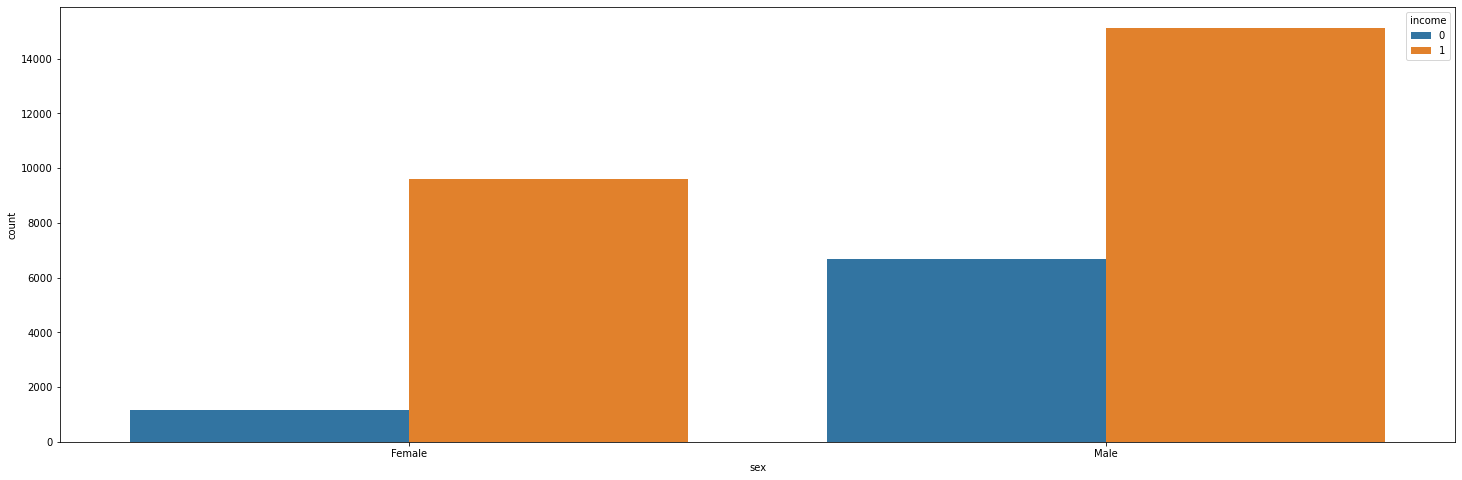

In [278]:
plt.figure(figsize = (25,8))
sns.countplot(x = df["sex"] , hue = df["income"])
plt.show()

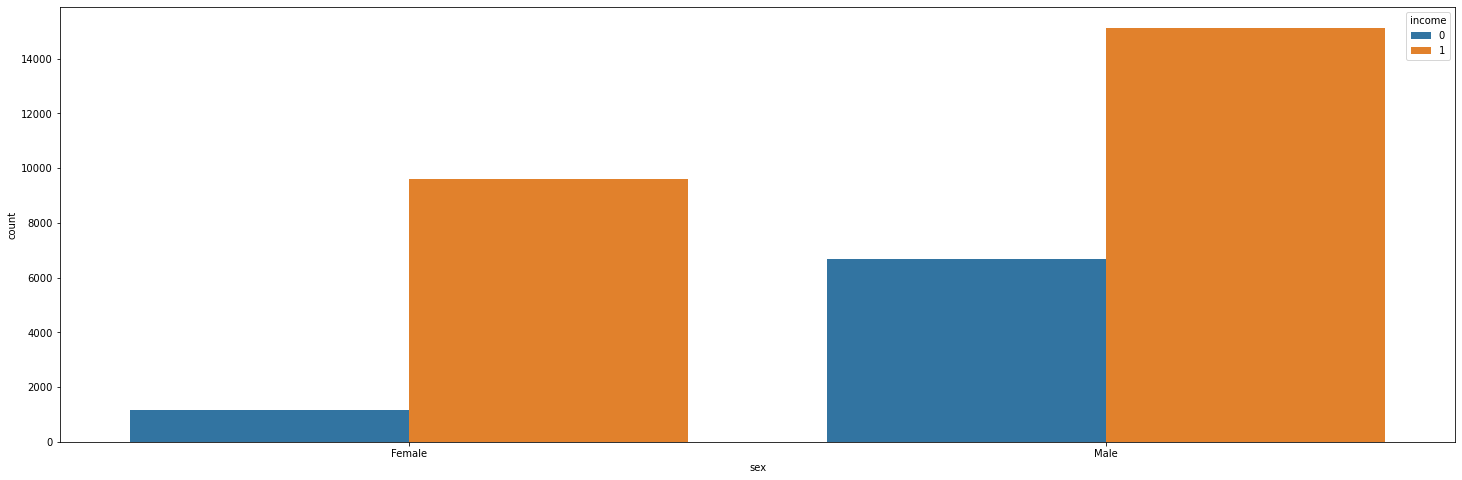

In [279]:
plt.figure(figsize = (25,8))
sns.countplot(x = df["sex"] , hue = df["income"])
plt.show()

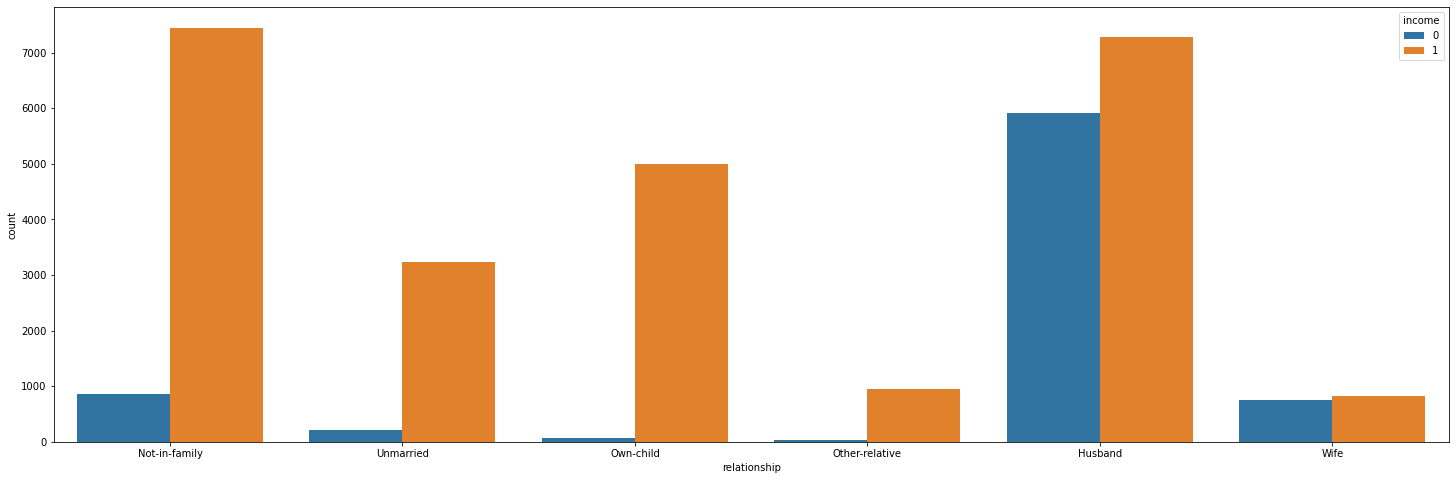

In [280]:

plt.figure(figsize = (25,8))
sns.countplot(x = df["relationship"] , hue=df["income"])
plt.show()

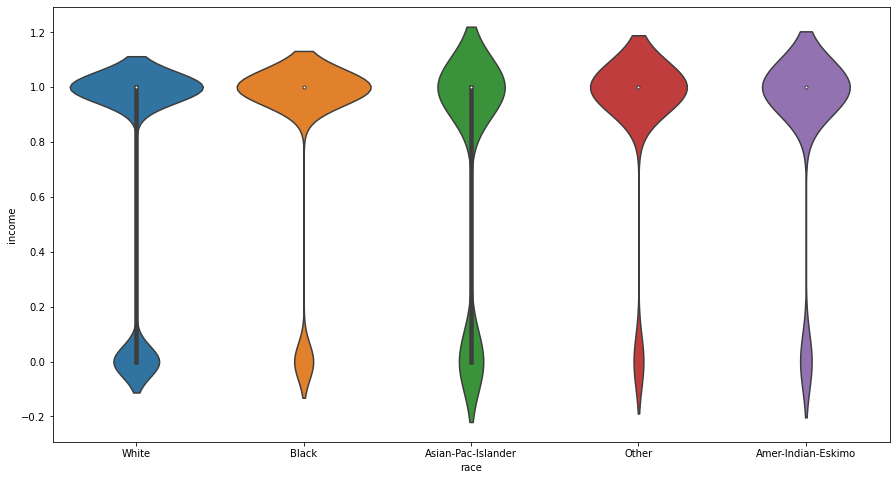

In [281]:
plt.figure(figsize = (15,8))
sns.violinplot(x = df["race"],y=df["income"])
plt.show()

In [282]:
 
# country have most number of peoplr have more than 50k dollar income
df.groupby(["native.country","income"])["race"].count().reset_index().sort_values(by = "race" , ascending = False)
 

,native.country,income,race
75,United-States,1,21999
74,United-States,0,7171
50,Mexico,1,610
57,Philippines,1,137
63,Puerto-Rico,1,102
...,...,...,...
72,Trinadad&Tobago,0,2
51,Nicaragua,0,2
47,Laos,0,2
29,Honduras,0,1


In [283]:
df.dtypes

age                 int64
workclass          object
fnlwgt             object
education          object
education.num       int64
marital.status     object
occupation         object
relationship       object
race               object
sex                object
capital.gain        int64
capital.loss      float64
hours.per.week      int64
native.country     object
income              int32
dtype: object

Discriptive statics of Numerical feature

Index(['age', 'education.num', 'capital.gain', 'capital.loss',
       'hours.per.week', 'income'],
      dtype='object')


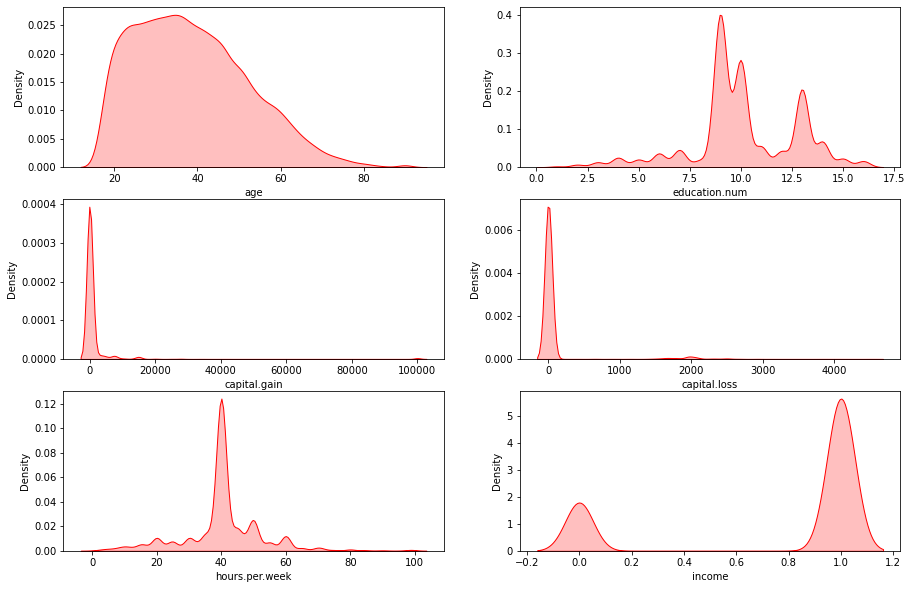

In [284]:
numeric = ["int32","int64","float32","float64"]
fig , ax = plt.subplots(3,2 , figsize = (15,10))
columns = df.select_dtypes(include =numeric ).columns
print(columns)
index = 0
for i in range(3):
    for j in range(2):
        sns.kdeplot(x = df[columns[index]] , ax = ax[i][j] , color = "red",fill = True)
        index+=1
plt.show()

There is skewness in every feature 



In [285]:
df1 = df[df.select_dtypes(include =numeric ).columns]

In [286]:
df1.skew()

age                0.558743
education.num     -0.311676
capital.gain      11.953848
capital.loss       4.596479
hours.per.week     0.227643
income            -1.212430
dtype: float64

In [287]:
# Descriptive statics
df.describe()

,age,education.num,capital.gain,capital.loss,hours.per.week,income
count,32561.000000,32561.000000,32561.000000,32560.000000,32561.000000,32561.000000
mean,38.581647,10.080679,1077.648844,90.735720,40.437456,0.759190
std,13.640433,2.572720,7385.292085,418.943954,12.347429,0.427581
min,17.000000,1.000000,0.000000,0.000000,1.000000,0.000000
25%,28.000000,9.000000,0.000000,0.000000,40.000000,1.000000
50%,37.000000,10.000000,0.000000,0.000000,40.000000,1.000000
75%,48.000000,12.000000,0.000000,0.000000,45.000000,1.000000
max,90.000000,16.000000,99999.000000,4530.240000,99.000000,1.000000


May be in Every feature there is outlier

Bivarient Analysis of Numerical Columns With Income

Index(['age', 'education.num', 'capital.gain', 'capital.loss',
       'hours.per.week', 'income'],
      dtype='object')


C:\Users\NOOMAN KHAN\anaconda3\lib\site-packages\seaborn\distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)


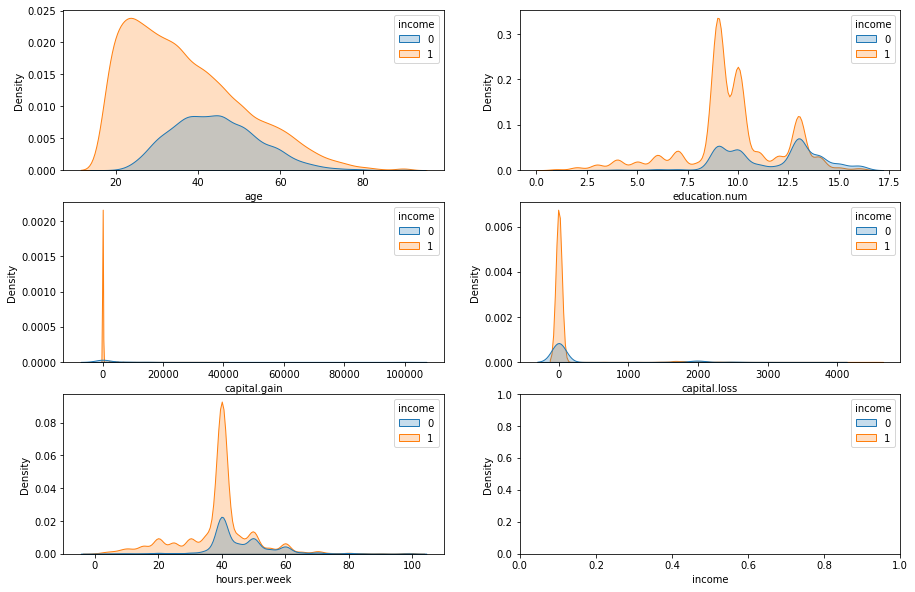

In [288]:
numeric = ["int32","int64","float32","float64"]
fig , ax = plt.subplots(3,2 , figsize = (15,10))
columns = df.select_dtypes(include =numeric ).columns
print(columns)
index = 0
for i in range(3):
    for j in range(2):
        sns.kdeplot(x = df[columns[index]] , ax = ax[i][j] ,hue = df["income"], color = "red",fill = True)
        index+=1
plt.show()

Data is Overlap

Pairplot For check multicolinearity and distribution of data

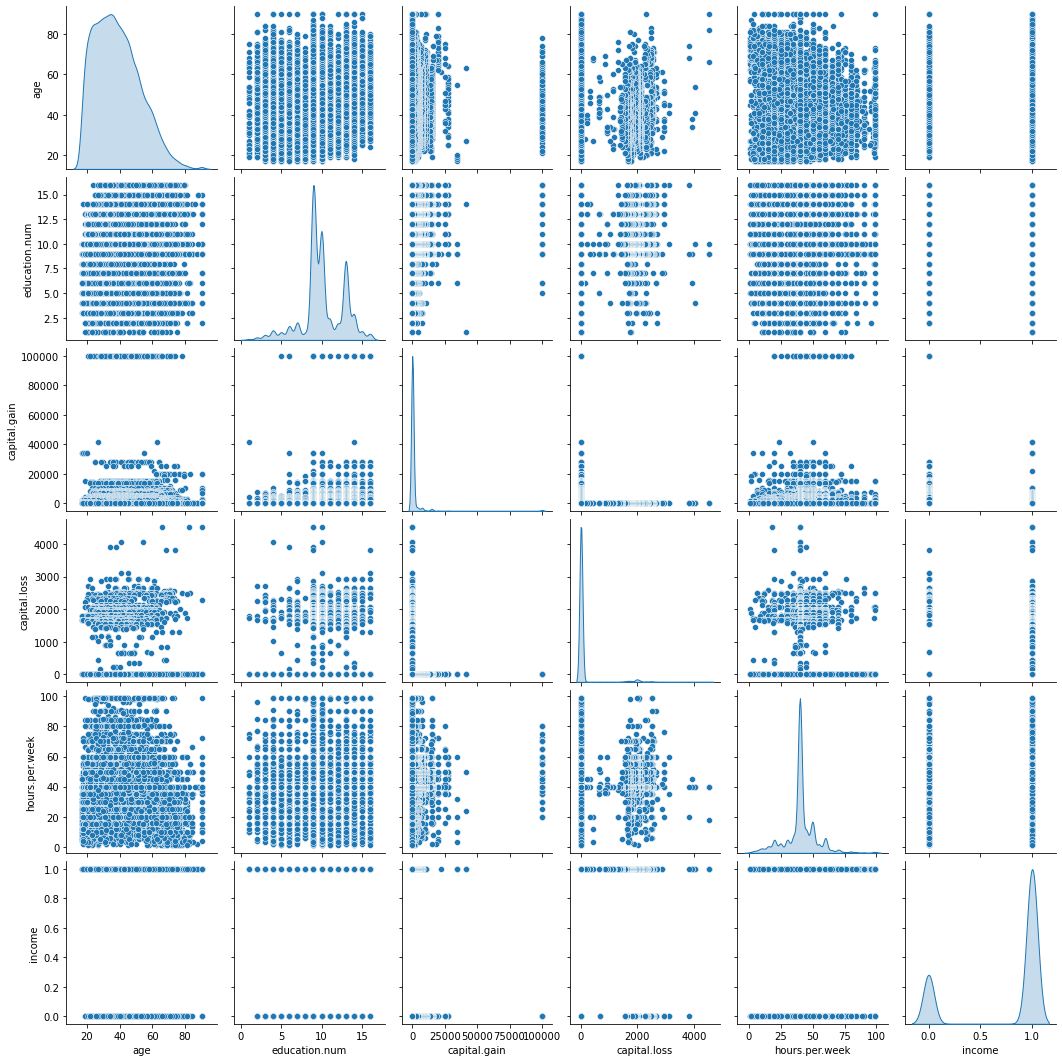

In [289]:
sns.pairplot(df , diag_kind = "kde" )

Target Feature

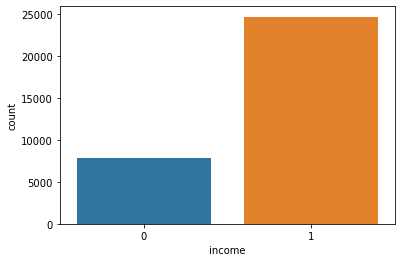

In [290]:
sns.countplot(x = df["income"])
plt.show()

Feature Engineering

Null Value Analysis

In [291]:
df.isnull().sum()

age                  0
workclass         1836
fnlwgt               0
education            0
education.num        0
marital.status       0
occupation        1843
relationship         1
race                 0
sex                  0
capital.gain         0
capital.loss         1
hours.per.week       0
native.country     583
income               0
dtype: int64

Workplace have 1836 null

Occupation have 1843 null

Native Country 583

all are categorical column we can go through random sample imputing either most repeated (mode)



random sample imputing

In [292]:
random_sample = df["workclass"].dropna().sample(df["workclass"].isnull().sum() , random_state = 0)
random_sample.index = df[df["workclass"].isnull()].index
df.loc[df["workclass"].isnull(),"workclass"] = random_sample

random_sample = df["occupation"].dropna().sample(df["occupation"].isnull().sum() , random_state = 0)
random_sample.index = df[df["occupation"].isnull()].index
df.loc[df["occupation"].isnull(),"occupation"] = random_sample

random_sample = df["native.country"].dropna().sample(df["native.country"].isnull().sum() , random_state = 0)
random_sample.index = df[df["native.country"].isnull()].index
df.loc[df["native.country"].isnull(),"native.country"] = random_sample




In [293]:
df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education.num     0
marital.status    0
occupation        0
relationship      1
race              0
sex               0
capital.gain      0
capital.loss      1
hours.per.week    0
native.country    0
income            0
dtype: int64

2 null value is remaining let's remove it 

In [294]:
df = df.dropna()

In [295]:
df.head(2)

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,Private,77053,HS-grad,9,Widowed,Transport-moving,Not-in-family,White,Female,0,4530.24,40,United-States,1
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4530.24,18,United-States,1


In [296]:
df.dtypes

age                 int64
workclass          object
fnlwgt             object
education          object
education.num       int64
marital.status     object
occupation         object
relationship       object
race               object
sex                object
capital.gain        int64
capital.loss      float64
hours.per.week      int64
native.country     object
income              int32
dtype: object

In [297]:
df["fnlwgt"]=pd.to_numeric(df["fnlwgt"] , errors = "coerce")

C:\Users\NOOMAN KHAN\AppData\Local\Temp\ipykernel_5828\3005535109.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["fnlwgt"]=pd.to_numeric(df["fnlwgt"] , errors = "coerce")


In [298]:
df = df.drop("education" , axis = 1)

In [299]:
df

,age,workclass,fnlwgt,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,Private,77053.0,9,Widowed,Transport-moving,Not-in-family,White,Female,0,4530.24,40,United-States,1
1,82,Private,132870.0,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4530.24,18,United-States,1
2,66,Private,186061.0,10,Widowed,Handlers-cleaners,Unmarried,Black,Female,0,4530.24,40,United-States,1
3,54,Private,140359.0,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,4056.00,40,United-States,1
4,41,Private,264663.0,10,Separated,Prof-specialty,Own-child,White,Female,0,4056.00,40,United-States,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,22,Private,310152.0,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0.00,40,United-States,1
32557,27,Private,257302.0,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0.00,38,United-States,1
32558,40,Private,154374.0,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0.00,40,United-States,0
32559,58,Private,151910.0,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0.00,40,United-States,1


In [300]:
df = df.dropna()

Outliers Analysis

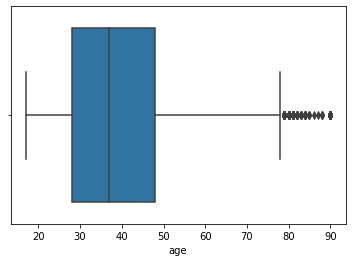

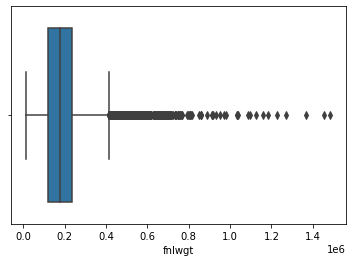

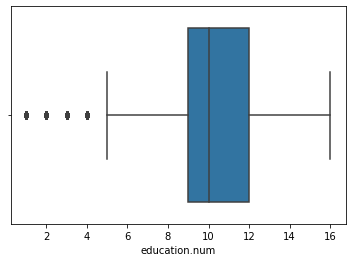

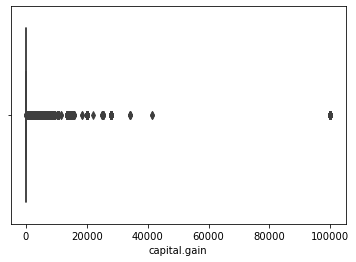

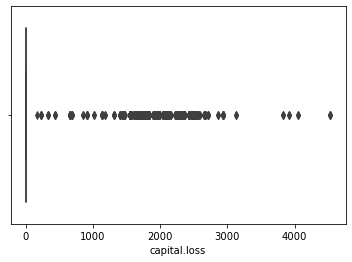

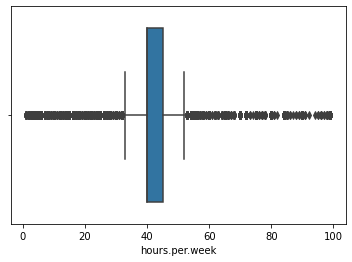

In [301]:
for i in ["age","fnlwgt","education.num","capital.gain","capital.loss","hours.per.week"]:
    plt.figure()
    sns.boxplot(x = df[i])

In [302]:
df1 = df.copy()

In [303]:
for i in ["age","fnlwgt","education.num","capital.gain","capital.loss","hours.per.week"]:
    q1 = df1[i].quantile(0.25)
    q3 = df1[i].quantile(0.75)
    IQR = q3-q1
    df1 = df1[(df1[i]>=(q1-1.5*IQR)) & (df1[i]<=(q3+1.5*IQR))]

In [304]:
df1

,age,workclass,fnlwgt,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
4232,38,Private,215646.0,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0.0,40,United-States,1
4233,53,Private,234721.0,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0.0,40,United-States,1
4234,28,Private,338409.0,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0.0,40,Cuba,1
4235,37,Private,284582.0,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0.0,40,United-States,1
4237,52,Self-emp-not-inc,209642.0,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0.0,45,United-States,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,53,Private,321865.0,14,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0.0,40,United-States,0
32556,22,Private,310152.0,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0.0,40,United-States,1
32557,27,Private,257302.0,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0.0,38,United-States,1
32558,40,Private,154374.0,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0.0,40,United-States,0


 Feature Selection

First Remove constant Varience Feature

In [305]:
from sklearn.feature_selection import VarianceThreshold
selector = VarianceThreshold(threshold = 0)

In [306]:
selector.fit_transform(df1.select_dtypes(include=numeric))

array([[3.80000e+01, 2.15646e+05, 9.00000e+00, 4.00000e+01, 1.00000e+00],
       [5.30000e+01, 2.34721e+05, 7.00000e+00, 4.00000e+01, 1.00000e+00],
       [2.80000e+01, 3.38409e+05, 1.30000e+01, 4.00000e+01, 1.00000e+00],
       ...,
       [2.70000e+01, 2.57302e+05, 1.20000e+01, 3.80000e+01, 1.00000e+00],
       [4.00000e+01, 1.54374e+05, 9.00000e+00, 4.00000e+01, 0.00000e+00],
       [5.80000e+01, 1.51910e+05, 9.00000e+00, 4.00000e+01, 1.00000e+00]])

In [307]:
selector.get_support()

array([ True,  True,  True, False, False,  True,  True])

In [308]:
# column which is not constant varience
df1.select_dtypes(include=numeric).columns[selector.get_support()]

Index(['age', 'fnlwgt', 'education.num', 'hours.per.week', 'income'], dtype='object')

In [309]:
constant_columns = [col for col in df1.select_dtypes(include=numeric).columns
                   if col not in df1.select_dtypes(include=numeric).columns[selector.get_support()]]

In [310]:
# column that have constatnt varience
constant_columns

['capital.gain', 'capital.loss']

In [311]:
df1 = df1.drop(constant_columns,axis = 1)

Country feature have num of country most records only for united USA it's not going to help in model

In [312]:
df1["native.country"].nunique()

40

there is 40 country if we encode all our model become complex

In [313]:
df1 = df1.drop("native.country" , axis=1)

Feature Selection based on corelation

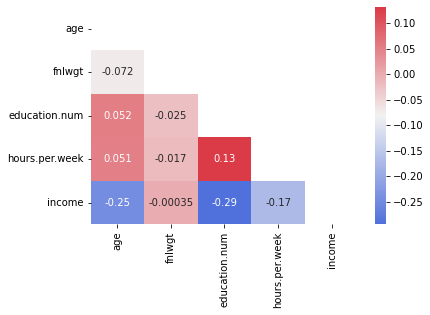

In [314]:
corr = df1.corr()
cmap = sns.diverging_palette(260, 10, as_cmap=True)

mask = np.triu(np.ones_like(df1.corr()))
sns.heatmap(corr,cmap=cmap,annot=True,mask = mask)
plt.show()

we can remove fnlwgt very less corelated to target

In [315]:
df1 = df1.drop("fnlwgt",axis = 1)

Encode categorical using one hot encoding

In [316]:
for i in df1.select_dtypes("object"):
    print(df1[i].value_counts())

Private             14376
Local-gov            1381
Self-emp-not-inc     1181
State-gov             861
Federal-gov           688
Self-emp-inc          510
Never-worked            3
Without-pay             3
Name: workclass, dtype: int64
Married-civ-spouse       8594
Never-married            6091
Divorced                 2965
Separated                 657
Widowed                   447
Married-spouse-absent     237
Married-AF-spouse          12
Name: marital.status, dtype: int64
Craft-repair         2923
Adm-clerical         2679
Exec-managerial      2477
Prof-specialty       2461
Sales                1975
Other-service        1690
Machine-op-inspct    1466
Transport-moving      940
Handlers-cleaners     865
Tech-support          616
Farming-fishing       431
Protective-serv       426
Priv-house-serv        48
Armed-Forces            6
Name: occupation, dtype: int64
Husband           7634
Not-in-family     5150
Own-child         2574
Unmarried         2257
Wife               841
Other-r

In [317]:
df

,age,workclass,fnlwgt,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,Private,77053.0,9,Widowed,Transport-moving,Not-in-family,White,Female,0,4530.24,40,United-States,1
1,82,Private,132870.0,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4530.24,18,United-States,1
2,66,Private,186061.0,10,Widowed,Handlers-cleaners,Unmarried,Black,Female,0,4530.24,40,United-States,1
3,54,Private,140359.0,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,4056.00,40,United-States,1
4,41,Private,264663.0,10,Separated,Prof-specialty,Own-child,White,Female,0,4056.00,40,United-States,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,22,Private,310152.0,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0.00,40,United-States,1
32557,27,Private,257302.0,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0.00,38,United-States,1
32558,40,Private,154374.0,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0.00,40,United-States,0
32559,58,Private,151910.0,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0.00,40,United-States,1


In [318]:
for i in df1.select_dtypes("object"):
    df1 = pd.get_dummies(data = df1 , columns = [i] , drop_first = True)

In [319]:
df1

,age,education.num,hours.per.week,income,workclass_Local-gov,workclass_Never-worked,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,workclass_State-gov,...,relationship_Not-in-family,relationship_Other-relative,relationship_Own-child,relationship_Unmarried,relationship_Wife,race_Asian-Pac-Islander,race_Black,race_Other,race_White,sex_Male
4232,38,9,40,1,0,0,1,0,0,0,...,1,0,0,0,0,0,0,0,1,1
4233,53,7,40,1,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,1
4234,28,13,40,1,0,0,1,0,0,0,...,0,0,0,0,1,0,1,0,0,0
4235,37,14,40,1,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0
4237,52,9,45,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,53,14,40,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,1
32556,22,10,40,1,0,0,1,0,0,0,...,1,0,0,0,0,0,0,0,1,1
32557,27,12,38,1,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0
32558,40,9,40,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,1


 Select target and independent

In [320]:
X = df1.drop("income",axis = 1).values
Y = df1[["income"]].values

SPLITING

In [321]:
# split data 80:20 ratio 80% for training 20% from testing
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2 , random_state = 42)


Scaling

In [322]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

Model Buildig

b. Train the logistic regression model and determine the training accuracy
and testing accuracy and print confusion Matrix

In [323]:
from sklearn.model_selection import KFold
kfold_validation = KFold(10)

In [324]:
from sklearn.linear_model import LogisticRegression
lg = LogisticRegression()
lg.fit(X_train,Y_train.ravel())

LogisticRegression()

In [325]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

cross validation

In [326]:
from sklearn.model_selection import cross_val_score
result = cross_val_score(lg,X_train,Y_train,cv =kfold_validation )
print(result)

C:\Users\NOOMAN KHAN\anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\NOOMAN KHAN\anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\NOOMAN KHAN\anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\NOOMAN KHAN\anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the s

[0.82905983 0.84089415 0.83355263 0.82631579 0.84342105 0.84539474
 0.84407895 0.84671053 0.84605263 0.84013158]


In [327]:
result

array([0.82905983, 0.84089415, 0.83355263, 0.82631579, 0.84342105,
       0.84539474, 0.84407895, 0.84671053, 0.84605263, 0.84013158])

In [328]:
import numpy as np

In [329]:
np.mean(result)

0.8395611872383126

Proformence metrics for testing

In [330]:
Y_pred = lg.predict(X_test)

In [331]:
from sklearn import metrics
c_f = metrics.confusion_matrix(Y_test,Y_pred)

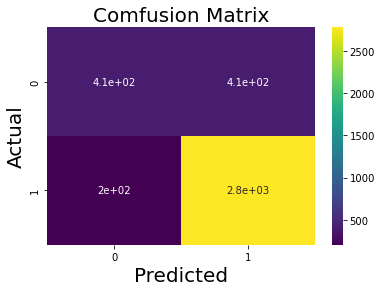

In [332]:
sns.heatmap(c_f , annot = True , cmap="viridis")
plt.xlabel("Predicted" , fontsize = 20)
plt.ylabel("Actual" , fontsize = 20)
plt.title("Comfusion Matrix" , fontsize = 20)
plt.show()


In [333]:
TN , FP , FN , TP = c_f.ravel()

In [334]:
print("TN is ",TN)
print("FP is ",FP)
print("FN is ",FN)
print("TP is ",TP)

TN is  409
FP is  410
FN is  204
TP is  2778


In [335]:
print("Model Accuracy is" , metrics.accuracy_score(Y_test,Y_pred))
 

Model Accuracy is 0.8384635622204683


In [336]:
print(metrics.classification_report(Y_test , Y_pred))

              precision    recall  f1-score   support

           0       0.67      0.50      0.57       819
           1       0.87      0.93      0.90      2982

    accuracy                           0.84      3801
   macro avg       0.77      0.72      0.74      3801
weighted avg       0.83      0.84      0.83      3801



Probability

In [337]:
Y_pred_proba = lg.predict_proba(X_test)[::,1]

In [338]:
FPR,TPR,THER = metrics.roc_curve(Y_test , Y_pred_proba)

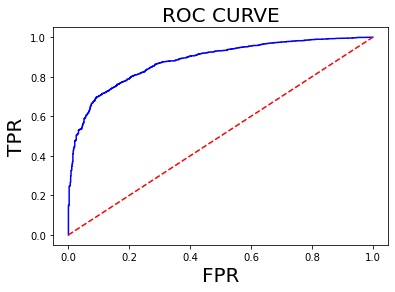

Area Under The Curve is 0.8809517667666561


In [339]:
plt.plot(FPR,TPR , color = "blue")
plt.plot(FPR,FPR,linestyle = "--" , color = "red")
plt.xlabel("FPR" , fontsize = 20)
plt.ylabel("TPR" , fontsize = 20)
plt.title("ROC CURVE" , fontsize = 20)
plt.show()
print("Area Under The Curve is" , metrics.roc_auc_score(Y_test,Y_pred_proba))

Training Accuracy

In [340]:
Y_pred = lg.predict(X_train)

In [341]:
from sklearn import metrics
print(metrics.classification_report(Y_train , Y_pred))


              precision    recall  f1-score   support

           0       0.66      0.50      0.57      3203
           1       0.87      0.93      0.90     11999

    accuracy                           0.84     15202
   macro avg       0.77      0.72      0.74     15202
weighted avg       0.83      0.84      0.83     15202



In [342]:
metrics.accuracy_score(Y_train , Y_pred)

0.8409419813182476

In [343]:
# lg()

Hypermeter Tuning

In [344]:
from sklearn.model_selection import GridSearchCV
parameters = {
    "penalty":['l1', 'l2', 'elasticnet'],
    "C":[1,2,3,4,5,6,10,30,40,50],
    "max_iter":[100,200,300]
    
}

In [345]:
classifier_regressor = GridSearchCV(estimator = lg , param_grid = parameters ,
                                    scoring = "accuracy" , cv = 5)

In [346]:
classifier_regressor.fit(X_train , Y_train.ravel())

C:\Users\NOOMAN KHAN\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
300 fits failed out of a total of 450.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
150 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\NOOMAN KHAN\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\NOOMAN KHAN\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1091, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\NOOMAN KHAN\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 61, in _check_solver


GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [1, 2, 3, 4, 5, 6, 10, 30, 40, 50],
                         'max_iter': [100, 200, 300],
                         'penalty': ['l1', 'l2', 'elasticnet']},
             scoring='accuracy')

In [347]:
classifier_regressor.best_params_

{'C': 1, 'max_iter': 100, 'penalty': 'l2'}

In [348]:
classifier_regressor.best_score_


0.8402846622475295

In [349]:
Y_pred = classifier_regressor.predict(X_test)

In [350]:
metrics.accuracy_score(Y_test , Y_pred)

0.8384635622204683

In [351]:
Y_pred_proba = classifier_regressor.predict_proba(X_test)[::,1]

Change the threshold probability of the logistic regression model to 60% and print the
confusion matrix.

In [352]:
data = pd.DataFrame([Y_test.ravel() ,Y_pred_proba] , index = ["Yact" ,"Prob"]).transpose()

In [353]:
data["Y_pred"] =np.where(data["Prob"]>=0.6,1.0,0.0)

In [354]:
data

,Yact,Prob,Y_pred
0,1.0,0.847346,1.0
1,1.0,0.989472,1.0
2,1.0,0.984917,1.0
3,1.0,0.726224,1.0
4,1.0,0.984599,1.0
...,...,...,...
3796,0.0,0.443917,0.0
3797,0.0,0.589091,0.0
3798,0.0,0.906007,1.0
3799,1.0,0.990457,1.0


In [355]:
c_f = metrics.confusion_matrix(data["Yact"].values.ravel(),data["Y_pred"].values.ravel())

In [356]:
c_f

array([[ 510,  309],
       [ 314, 2668]], dtype=int64)

c. Train the Decision tree model and determine the training accuracy and
testing accuracy and print confusion Matrix

# Decision Tree

In [357]:
df = df.drop(["capital.gain","capital.loss","native.country","fnlwgt"],axis = 1)

In [358]:
for i in df.select_dtypes("object"):
    df = pd.get_dummies(data = df , columns = [i] , drop_first = True)

In [359]:
X = df.drop("income",axis = 1).values
Y = df[["income"]].values

In [360]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2 , random_state = 42)

In [361]:
from sklearn.tree import DecisionTreeClassifier
DT = DecisionTreeClassifier()
DT.fit(X_train,Y_train.ravel())

DecisionTreeClassifier()

In [362]:
Y_pred = DT.predict(X_test)

In [363]:
from sklearn import metrics
c_f = metrics.confusion_matrix(Y_test,Y_pred)

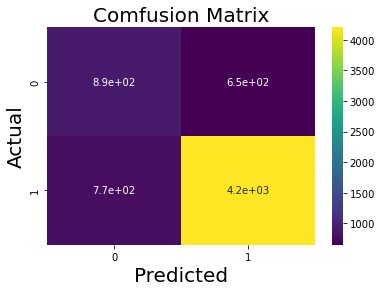

In [364]:
sns.heatmap(c_f , annot = True , cmap="viridis")
plt.xlabel("Predicted" , fontsize = 20)
plt.ylabel("Actual" , fontsize = 20)
plt.title("Comfusion Matrix" , fontsize = 20)
plt.show()


In [365]:
print("Model Accuracy is" , metrics.accuracy_score(Y_test,Y_pred))

Model Accuracy is 0.7819410319410319


In [366]:
print(metrics.classification_report(Y_test , Y_pred))

              precision    recall  f1-score   support

           0       0.53      0.58      0.56      1536
           1       0.87      0.85      0.86      4976

    accuracy                           0.78      6512
   macro avg       0.70      0.71      0.71      6512
weighted avg       0.79      0.78      0.78      6512



In [367]:
Y_pred_proba = DT.predict_proba(X_test)[::,1]

In [368]:
FPR,TPR,THER = metrics.roc_curve(Y_test , Y_pred_proba)

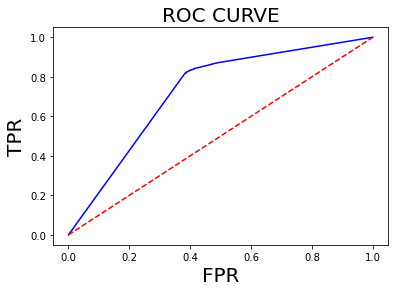

Area Under The Curve is 0.7245865440573084


In [369]:
plt.plot(FPR,TPR , color = "blue")
plt.plot(FPR,FPR,linestyle = "--" , color = "red")
plt.xlabel("FPR" , fontsize = 20)
plt.ylabel("TPR" , fontsize = 20)
plt.title("ROC CURVE" , fontsize = 20)
plt.show()
print("Area Under The Curve is" , metrics.roc_auc_score(Y_test,Y_pred_proba))

Hypermeter Tuning in Decision Tree

In [370]:
from sklearn.model_selection import GridSearchCV
parameters = {
    "criterion":['gini', 'entropy'],
    "max_depth":[2,3,5,7,8,9,10,12,15,12],
    "min_samples_leaf":[2,3,5,7,8,9,10,12,15,12],
    "max_features":['auto', 'sqrt', 'log2']
}

In [371]:
Grid_Classifier = GridSearchCV(estimator = DT ,param_grid = parameters,cv = 5 , scoring = "accuracy")
Grid_Classifier

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 5, 7, 8, 9, 10, 12, 15, 12],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [2, 3, 5, 7, 8, 9, 10, 12, 15,
                                              12]},
             scoring='accuracy')

In [372]:
Grid_Classifier.fit(X_train , Y_train)

C:\Users\NOOMAN KHAN\anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\NOOMAN KHAN\anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\NOOMAN KHAN\anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\NOOMAN KHAN\anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
 

C:\Users\NOOMAN KHAN\anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\NOOMAN KHAN\anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\NOOMAN KHAN\anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\NOOMAN KHAN\anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
 

C:\Users\NOOMAN KHAN\anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\NOOMAN KHAN\anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\NOOMAN KHAN\anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\NOOMAN KHAN\anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
 

C:\Users\NOOMAN KHAN\anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\NOOMAN KHAN\anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\NOOMAN KHAN\anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\NOOMAN KHAN\anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
 

C:\Users\NOOMAN KHAN\anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\NOOMAN KHAN\anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\NOOMAN KHAN\anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\NOOMAN KHAN\anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
 

C:\Users\NOOMAN KHAN\anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\NOOMAN KHAN\anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\NOOMAN KHAN\anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\NOOMAN KHAN\anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
 

C:\Users\NOOMAN KHAN\anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\NOOMAN KHAN\anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\NOOMAN KHAN\anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\NOOMAN KHAN\anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
 

C:\Users\NOOMAN KHAN\anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\NOOMAN KHAN\anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\NOOMAN KHAN\anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\NOOMAN KHAN\anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
 

C:\Users\NOOMAN KHAN\anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\NOOMAN KHAN\anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\NOOMAN KHAN\anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\NOOMAN KHAN\anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
 

C:\Users\NOOMAN KHAN\anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\NOOMAN KHAN\anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\NOOMAN KHAN\anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\NOOMAN KHAN\anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
 

C:\Users\NOOMAN KHAN\anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\NOOMAN KHAN\anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\NOOMAN KHAN\anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\NOOMAN KHAN\anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
 

C:\Users\NOOMAN KHAN\anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\NOOMAN KHAN\anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\NOOMAN KHAN\anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\NOOMAN KHAN\anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
 

C:\Users\NOOMAN KHAN\anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\NOOMAN KHAN\anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\NOOMAN KHAN\anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\NOOMAN KHAN\anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
 

C:\Users\NOOMAN KHAN\anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\NOOMAN KHAN\anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\NOOMAN KHAN\anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\NOOMAN KHAN\anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
 

C:\Users\NOOMAN KHAN\anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\NOOMAN KHAN\anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\NOOMAN KHAN\anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\NOOMAN KHAN\anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
 

C:\Users\NOOMAN KHAN\anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\NOOMAN KHAN\anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\NOOMAN KHAN\anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\NOOMAN KHAN\anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
 

C:\Users\NOOMAN KHAN\anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\NOOMAN KHAN\anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\NOOMAN KHAN\anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\NOOMAN KHAN\anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
 

C:\Users\NOOMAN KHAN\anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\NOOMAN KHAN\anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\NOOMAN KHAN\anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\NOOMAN KHAN\anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
 

C:\Users\NOOMAN KHAN\anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\NOOMAN KHAN\anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\NOOMAN KHAN\anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\NOOMAN KHAN\anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
 

C:\Users\NOOMAN KHAN\anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\NOOMAN KHAN\anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\NOOMAN KHAN\anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\NOOMAN KHAN\anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
 

C:\Users\NOOMAN KHAN\anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\NOOMAN KHAN\anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\NOOMAN KHAN\anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\NOOMAN KHAN\anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
 

C:\Users\NOOMAN KHAN\anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\NOOMAN KHAN\anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\NOOMAN KHAN\anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\NOOMAN KHAN\anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
 

C:\Users\NOOMAN KHAN\anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\NOOMAN KHAN\anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\NOOMAN KHAN\anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\NOOMAN KHAN\anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
 

C:\Users\NOOMAN KHAN\anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\NOOMAN KHAN\anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\NOOMAN KHAN\anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\NOOMAN KHAN\anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
 

C:\Users\NOOMAN KHAN\anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\NOOMAN KHAN\anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\NOOMAN KHAN\anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\NOOMAN KHAN\anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
 

C:\Users\NOOMAN KHAN\anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\NOOMAN KHAN\anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\NOOMAN KHAN\anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\NOOMAN KHAN\anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
 

C:\Users\NOOMAN KHAN\anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\NOOMAN KHAN\anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\NOOMAN KHAN\anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\NOOMAN KHAN\anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
 

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 5, 7, 8, 9, 10, 12, 15, 12],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [2, 3, 5, 7, 8, 9, 10, 12, 15,
                                              12]},
             scoring='accuracy')

In [373]:
Grid_Classifier.best_params_

{'criterion': 'entropy',
 'max_depth': 15,
 'max_features': 'auto',
 'min_samples_leaf': 10}

In [374]:
Grid_Classifier.best_score_

0.8284123632175081

In [375]:
Y_pred = Grid_Classifier.predict(X_test)

In [376]:
from sklearn import metrics
c_f = metrics.confusion_matrix(Y_test,Y_pred)

In [377]:
print("Model Accuracy is" , metrics.accuracy_score(Y_test,Y_pred))

Model Accuracy is 0.8247850122850123


In [378]:
print(metrics.classification_report(Y_test , Y_pred))

              precision    recall  f1-score   support

           0       0.69      0.46      0.55      1536
           1       0.85      0.94      0.89      4976

    accuracy                           0.82      6512
   macro avg       0.77      0.70      0.72      6512
weighted avg       0.81      0.82      0.81      6512



In [379]:
Y_pred_proba = Grid_Classifier.predict_proba(X_test)[::,1]

In [380]:
FPR,TPR,THER = metrics.roc_curve(Y_test , Y_pred_proba)

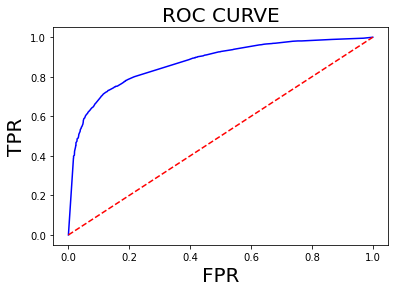

Area Under The Curve is 0.8718217234391747


In [381]:
plt.plot(FPR,TPR , color = "blue")
plt.plot(FPR,FPR,linestyle = "--" , color = "red")
plt.xlabel("FPR" , fontsize = 20)
plt.ylabel("TPR" , fontsize = 20)
plt.title("ROC CURVE" , fontsize = 20)
plt.show()
print("Area Under The Curve is" , metrics.roc_auc_score(Y_test,Y_pred_proba))

# Random Forest

In [382]:
from sklearn.model_selection import GridSearchCV
n_estimators = [int(x) for x in np.linspace(100,1000,100)]
criterion = ['gini', 'entropy', 'log_loss']
max_depth = [int(x) for x in np.linspace(5,100,20)]
min_samples_split = [4,5,6,7,8,9,10,11,12,13,14]
min_samples_leaf = [4,5,6,7,8,9,10,11,12,13,14]
max_features = ['sqrt', 'log2']
random_grid = {
    'n_estimators' : n_estimators,
    'criterion':criterion,
    'max_depth':max_depth,
    'min_samples_split':min_samples_split,
    'min_samples_leaf':min_samples_leaf,
    'max_features':max_features
}

 


In [383]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()

In [384]:
from sklearn.model_selection import  RandomizedSearchCV 
random  =  RandomizedSearchCV(estimator = model , param_distributions = random_grid ,n_iter = 100
                             ,cv=5 , n_jobs = -1,verbose = 2)

In [ ]:
random.fit(X_train , Y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


In [ ]:
random.best_params_

In [ ]:
RFC = RandomForestClassifier(n_estimators= 663,
 min_samples_split= 8,
 min_samples_leaf= 4,
 max_features='sqrt',
 max_depth=70,
 criterion='gini')

In [ ]:
RFC.fit(X_train,Y_train)

In [ ]:
Y_pred = RFC.predict(X_test)

In [ ]:
from sklearn import metrics
metrics.confusion_matrix(Y_test,Y_pred)

In [ ]:
print(metrics.classification_report(Y_test , Y_pred))

In [ ]:
metrics.accuracy_score(Y_test , Y_pred)

In [ ]:
Y_pred_proba = RFC.predict_proba(X_test)[::,1]

In [ ]:
FPR,TPR,THER = metrics.roc_curve(Y_test , Y_pred_proba)

In [ ]:
plt.plot(FPR,TPR , color = "blue")
plt.plot(FPR,FPR,linestyle = "--" , color = "red")
plt.xlabel("FPR" , fontsize = 20)
plt.ylabel("TPR" , fontsize = 20)
plt.title("ROC CURVE" , fontsize = 20)
plt.show()
print("Area Under The Curve is" , metrics.roc_auc_score(Y_test,Y_pred_proba))

PART 2

Q2. What do you mean by ensemble technique, explain the Random Forest algorithm?

Q3. What do you understand by Bagging?

Q4. What does random refer to in ‘Random Forest’?

Q5. How decision trees in Random Forest are different from decision tree in Decision Tree
algorithm?

Q6. What are overfitting and underfitting? Why does the decision tree algorithm suffer often
with overfitting problems?


Q7. Name a few hyper-parameters of decision trees?

Q8. What is bagging and feature randomness in Random Forest Classifier.


#### ensemble technique

We all do that. Before we make any big decisions, we ask people’s opinions, like our friends, our family members, even our dogs/cats, to prevent us from being biased😕 or irrational😍.


The model does that too. it is very common that the individual model suffers from bias or variances and that’s why we need the ensemble learning.


Ensemble learning, in general, is a model that makes predictions based on a number of different models. By combining individual models, the ensemble model tends to be more flexible🤸‍♀️ (less bias) and less data-sensitive🧘‍♀️ (less variance).

#### Rabdom Forest
Random forest is an ensemble model using bagging as the ensemble method and decision tree as the individual model.

Let’s take a closer look at the magic🔮 of the randomness:

Step 1: Select n (e.g. 1000) random subsets from the training set

Step 2: Train n (e.g. 1000) decision trees

one random subset is used to train one decision tree
the optimal splits for each decision tree are based on a random subset of features (e.g. 10 features in total, randomly select 5 out of 10 features to split)
Step 3: Each individual tree predicts the records/candidates in the test set, independently.

Step 4: Make the final prediction

For each candidate in the test set, Random Forest uses the class (e.g. cat or dog) with the majority vote as this candidate’s final prediction.

Of course, our 1000 trees are the parliament here.



### Q3. What do you understand by Bagging?

Bagging: Training a bunch of individual models in a parallel way. Each model is trained by a random subset of the data

Boosting: Training a bunch of individual models in a sequential way. Each individual model learns from mistakes made by the previous model.


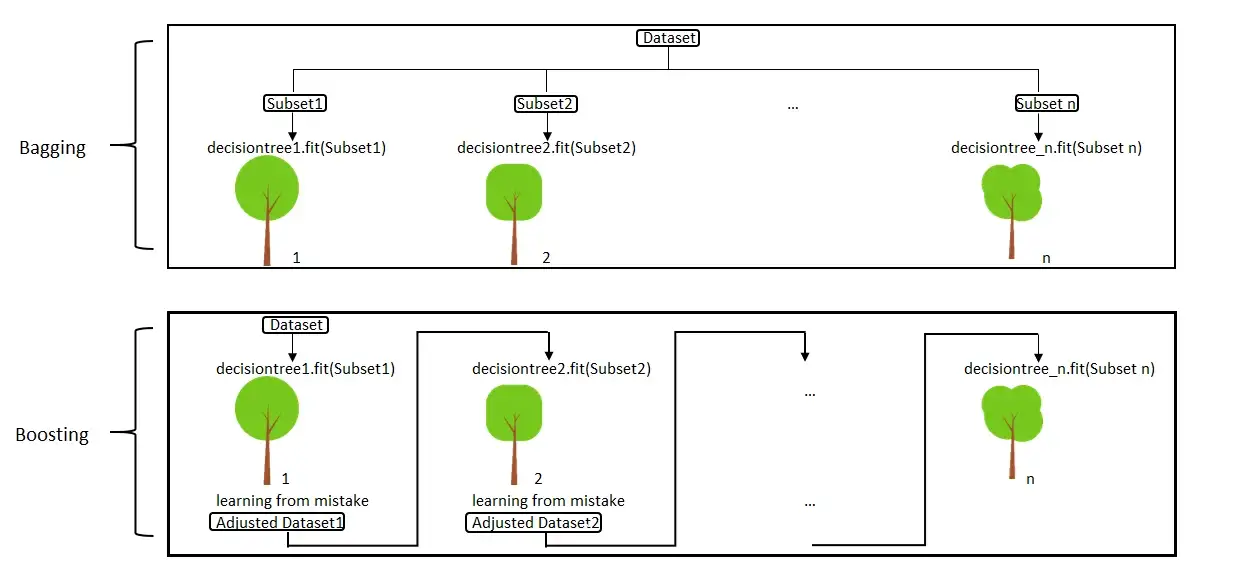

Q4. What does random refer to in ‘Random Forest’?

Random Record Selection: Each tree in the forest is trained on roughly 2/3rd of the total training data (exactly 63.2%) and here the data points are drawn at random with replacement from the original training dataset. This sample will act as the training set for growing the tree.

Random Variable Selection: Some independent variables(predictors) say, m are selected at random out of all the predictor variables, and the best split on this m is used to split the node.

NOTE:

By default, m is taken as the square root of the total number of predictors for classification whereas m is the total number of all predictors divided by 3 for regression problems.
The value of m remains constant during the algorithm run i.e, forest growing.

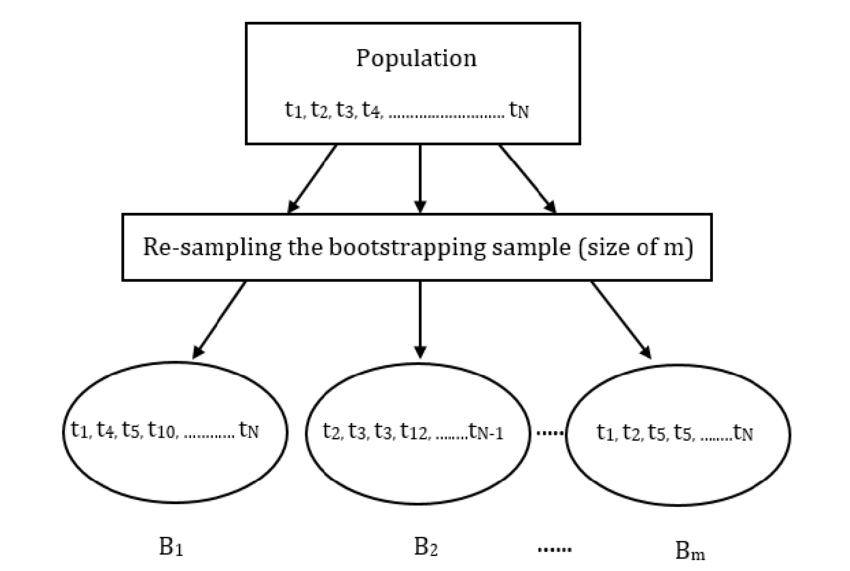

Q5. How decision trees in Random Forest are different from decision tree in Decision Tree algorithm?

Decision Tree is a single modle random forest is combination of number of decision tree the output depends on majority

Q6. What are overfitting and underfitting? Why does the decision tree algorithm suffer often with overfitting problems?

Overfitting is a statistical model or machine learning algorithm which captures the noise of the data. Underfitting is a model or machine learning algorithm which does not fit the data well enough and occurs if the model or algorithm shows low variance but high bias.
In decision trees, overfitting occurs when the tree is designed to perfectly fit all samples in the training data set. This results in branches with strict rules or sparse data and affects the accuracy when predicting samples that aren’t part of the training set.

 Q7)Name a few hyper-parameters of decision trees?

n_estimator

Max_depth

min_sample_leaf

min_sample_split

max_feature

Q8. What is bagging and feature randomness in Random Forest Classifier

Bootstrap Aggregation (Bagging)
Bootstrap Aggregation (or Bagging for short), is a simple and very powerful ensemble method.

An ensemble method is a technique that combines the predictions from multiple machine learning algorithms together to make more accurate predictions than any individual model.

Bootstrap Aggregation is a general procedure that can be used to reduce the variance for those algorithm that have high variance. An algorithm that has high variance are decision trees, like classification and regression trees (CART).

Decision trees are sensitive to the specific data on which they are trained. If the training data is changed (e.g. a tree is trained on a subset of the training data) the resulting decision tree can be quite different and in turn the predictions can be quite different.

Bagging is the application of the Bootstrap procedure to a high-variance machine learning algorithm, typically decision trees.

Let’s assume we have a sample dataset of 1000 instances (x) and we are using the CART algorithm. Bagging of the CART algorithm would work as follows.

Create many (e.g. 100) random sub-samples of our dataset with replacement.
Train a CART model on each sample.
Given a new dataset, calculate the average prediction from each model.
For example, if we had 5 bagged decision trees that made the following class predictions for a in input sample: blue, blue, red, blue and red, we would take the most frequent class and predict blue.

When bagging with decision trees, we are less concerned about individual trees overfitting the training data. For this reason and for efficiency, the individual decision trees are grown deep (e.g. few training samples at each leaf-node of the tree) and the trees are not pruned. These trees will have both high variance and low bias. These are important characteristics of sub-models when combining predictions using bagging.

The only parameters when bagging decision trees is the number of samples and hence the number of trees to include. This can be chosen by increasing the number of trees on run after run until the accuracy begins to stop showing improvement (e.g. on a cross validation test harness). Very large numbers of models may take a long time to prepare, but will not overfit the training data.

Just like the decision trees themselves, Bagging can be used for classification and regression problems.

## Feature Randomness

In a normal decision tree, when it is time to split a node, we consider every
possible feature and pick the one that produces the most separation between the
observations in the left node vs. those in the right node.
In contrast, each tree in a random forest can pick only from a random subset of
features. This forces even more variation amongst the trees in the model and
ultimately results in lower correlation across trees and more diversification.
So in our random forest, we end up with trees that are not only trained on different
sets of data (thanks to bagging) but also use different features to make decisions.

Q9

In [ ]:
data = pd.read_csv("C:/Users/NOOMAN KHAN/Downloads/Assignment -13 dataset - Sheet1.csv")
data

In [ ]:
data.isnull().sum()

In [ ]:
data["Kyphosis"].value_counts()

In [ ]:
data["Kyphosis"] = np.where(data["Kyphosis"] =="present",1,0)

In [ ]:
X = data.drop("Kyphosis",axis = 1).values
Y = data[["Kyphosis"]].values

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2 , random_state = 42)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
DT = DecisionTreeClassifier()
DT.fit(X_train,Y_train.ravel())

In [ ]:
Y_pred = DT.predict(X_test)
from sklearn import metrics
c_f = metrics.confusion_matrix(Y_test,Y_pred)


In [ ]:
sns.heatmap(c_f , annot = True , cmap="viridis")
plt.xlabel("Predicted" , fontsize = 20)
plt.ylabel("Actual" , fontsize = 20)
plt.title("Comfusion Matrix" , fontsize = 20)
plt.show()

In [ ]:
print("Model Accuracy is" , metrics.accuracy_score(Y_test,Y_pred))

In [ ]:
print(metrics.classification_report(Y_test , Y_pred))

In [ ]:
Y_pred_proba = DT.predict_proba(X_test)[::,1]

In [ ]:
FPR,TPR,THER = metrics.roc_curve(Y_test , Y_pred_proba)

In [ ]:
plt.plot(FPR,TPR , color = "blue")
plt.plot(FPR,FPR,linestyle = "--" , color = "red")
plt.xlabel("FPR" , fontsize = 20)
plt.ylabel("TPR" , fontsize = 20)
plt.title("ROC CURVE" , fontsize = 20)
plt.show()
print("Area Under The Curve is" , metrics.roc_auc_score(Y_test,Y_pred_proba))